# UCLA Master in Quantitative Economics 
## Replication File for <i>Re-Estimating the Effect of Skill Specificity on Immigration Attitudes: A Double Machine Learning Approach<i>
### Author: Nathan Kim 
### Faculty Advisor: Denis Chetverikov

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as font_manager

# Parallel Trends

In [2]:
trends_df = pd.read_stata('gsp_data_final.dta')

In [3]:
trends_id = list(trends_df.loc[trends_df['unemployed2'] == 1]['pid'].unique())

In [4]:
trends_df = trends_df.groupby(by=['syear', 'unemployed2'])[['dv', 'concern_rec']].mean()

In [5]:
trends_0 = trends_df.loc[trends_df.index.get_level_values('unemployed2') == 0].reset_index(level=[0,1])
trends_1 = trends_df.loc[trends_df.index.get_level_values('unemployed2') == 1].reset_index(level=[0,1])

In [6]:
plt.style.use('ggplot')

font_style = {'fontname':'Garamond'}

font_legend = font_manager.FontProperties(family='Garamond',
                                          weight='bold',
                                          style='normal', size=16)

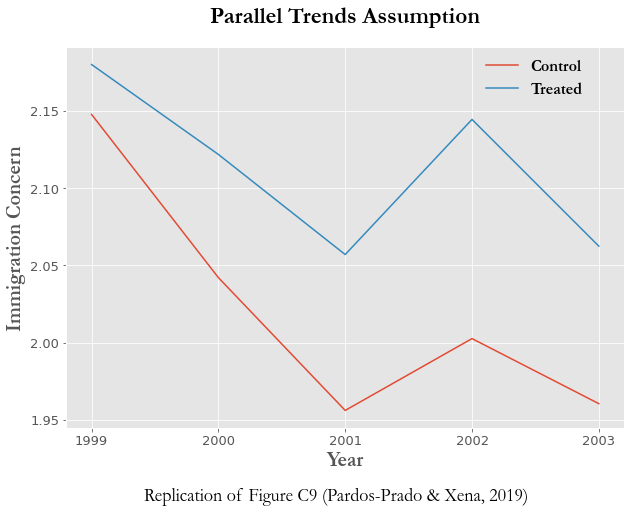

In [7]:
plt.figure(figsize=(10, 7))
plt.title('Parallel Trends Assumption', pad=25, fontsize=23,  fontweight='bold', **font_style)
plt.figtext(0.5, -0.02, 'Replication of Figure C9 (Pardos-Prado & Xena, 2019)', wrap=True, 
            horizontalalignment='center', fontsize=18, **font_style)
plt.plot(trends_0['syear'][0:5], trends_0['concern_rec'][0:5], label='Control')
plt.plot(trends_1['syear'][0:5], trends_1['concern_rec'][0:5], label='Treated')
plt.xticks(np.arange(1999, 2004, 1, dtype=int), fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('Immigration Concern', fontsize=20,  fontweight='bold', **font_style)
plt.xlabel('Year', fontsize=20,  fontweight='bold', **font_style)
plt.legend(loc=(0.74, 0.85), prop=font_legend, frameon=False)
# plt.savefig('trends.png', dpi=500)
plt.show()